# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  10 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов







-----

In [ ]:
# Bot check

# HW_ID: phds_hw1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=59dbd3452a6df147fa203bf5b660698bdce57ec3e96966ca28ce4de9fbf87bfd
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [2]:
import torchviz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.autograd import grad
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import precision_recall_fscore_support as all_metrics
from sklearn.metrics import accuracy_score

from collections import defaultdict

from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

from IPython.display import clear_output

In [3]:
sns.set(palette='Set2', font_scale=1.2)
%matplotlib inline

### Задача 1. Дифференцирование

Для функции

$$ f(x, y, z)=\left(\frac{y^4}{1+e^{-x}}\right)^3 + z$$

С помощью Pytorch:

- постройте вычислительный граф с возможностью считать производные по x, y.

- выведите все узлы полученного графа и их атрибуты (рассмотренные на лекции)

- объясните, почему атрибуты принимают такие значения

Для точки (1, 3, 2):

- посчитайте для функции все возможные первые частные производные методом backward()

- посчитайте для функции все возможные вторые частные производные

In [4]:
from torchviz import make_dot

In [ ]:
x = torch.tensor(1, requires_grad=True, dtype=torch.float)
y = torch.tensor(3, requires_grad=True, dtype=torch.float)
z = torch.tensor(2, requires_grad=False, dtype=torch.float)
f = ((y**4)/(1 + torch.exp(-x))**3 + z)

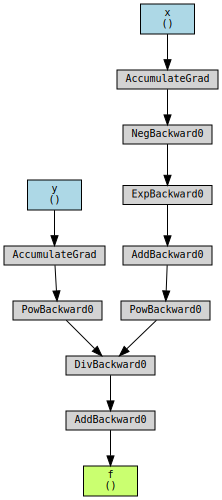

In [ ]:
make_dot(f, params={'x': x, 'y': y, 'z': z, 'f': f})

Ну тут просто вложенные функции. Например Х мы сначала берем со знаком "-", далее берем exp, складываем с 1 и используем далее в качестве знаменателя. Всё это отражено в схеме

In [ ]:
f.backward()

In [ ]:
print("df/dx = ", x.grad)
print("df/dy = ", y.grad)

df/dx =  tensor(25.5341)
df/dy =  tensor(42.1969)


In [ ]:
x.grad.zero_()
y.grad.zero_()

tensor(0.)

In [ ]:
d_x, d_y = torch.autograd.grad(f, [x,y], create_graph=True)

In [ ]:
d2_x, d2_y, dxdy = torch.autograd.grad([d_x,d_y,d_y], [x,y,x], create_graph=True)

In [ ]:
print("d^2f/dx^2 = ", d2_x.item())
print("d^2f/dy^2 = ", d2_y.item())
print("d^2f/dxdy = ", dxdy.item())

d^2f/dx^2 =  70.02555847167969
d^2f/dy^2 =  118.43923950195312
d^2f/dxdy =  70.02555847167969


### Задача 2.
#### Профиль физика

Скачайте [датасет](https://drive.google.com/file/d/1QqYK7Go96vR4l66MShlUuXxY0_FaBcYB/view?usp=sharing), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)

In [6]:
data = pd.read_csv('Z_boson.csv')
data

,Unnamed: 0,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,Zmumu
1,1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,Zee
2,2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,Zee
3,3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,Zee
4,4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,Zmumu
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,163589,25170371,39.1588,0.0434,2.8371,-1,48.0734,-0.8716,-0.7647,1,Zmumu
19996,19996,166033,486199311,38.4240,-1.3922,-1.9531,-1,30.3328,-0.9045,0.8390,1,Zmumu
19997,19997,173389,687651225,35.2640,-2.2673,-0.3794,-1,37.2768,-1.8151,2.9126,-1,Zee
19998,19998,172163,191162958,38.9526,-2.2869,1.4960,-1,48.5297,-2.1804,-1.0817,1,Zee


Удалите столбцы 'Unnamed: 0	', 'Run' и 'Event', так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

In [7]:
data.drop(['Unnamed: 0', 'Run', 'Event'], axis= 1 , inplace= True)

In [8]:
data.isnull().sum()

pt1      0
eta1     0
phi1     0
Q1       0
pt2      0
eta2     0
phi2     0
Q2       0
class    0
dtype: int64

Убедитесь, что классы сбалансированны.

In [9]:
(data['class'] == 'Zmumu').sum()

10000

Идеальный баланс

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец 'class') к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.

In [10]:
data['class'] = data['class'].replace({'Zee': 0, 'Zmumu': 1})

In [11]:
data

,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,1
1,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,0
2,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,0
3,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,0
4,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,1
...,...,...,...,...,...,...,...,...,...
19995,39.1588,0.0434,2.8371,-1,48.0734,-0.8716,-0.7647,1,1
19996,38.4240,-1.3922,-1.9531,-1,30.3328,-0.9045,0.8390,1,1
19997,35.2640,-2.2673,-0.3794,-1,37.2768,-1.8151,2.9126,-1,0
19998,38.9526,-2.2869,1.4960,-1,48.5297,-2.1804,-1.0817,1,0


#### Общая часть

In [12]:
class_lim_proba = 0.5 # критерий принадлежности к тому или иному классу
device = 'cuda'

Стандартизируйте данные

In [13]:
X = data[['pt1',	'eta1',	'phi1',	'Q1',	'pt2',	'eta2',	'phi2', 'Q2']]
y = data['class']

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [15]:
X_train0, X_val0, y_train0, y_val0 = train_test_split(X_std,y.values, test_size=0.2, random_state=42)

Далее сформируйте датасет в pytorch-обертке

In [16]:
X_train = torch.tensor(X_train0).to(torch.float)
X_val = torch.tensor(X_val0).to(torch.float)
y_train = torch.tensor(y_train0)
y_val = torch.tensor(y_val0)

Напишите вспомогательные функции, в одной из которых будет проходить обучение, а во вторй - валидация. Также в отдельной функцией можно описать отрисовку кривых обучения. На одном графике расположите значение функции потерь на трейне и валидации, а на другом -- значение метрики качества на ваш выбор, также для трейна и валидации)

In [17]:
criterion = nn.CrossEntropyLoss()

In [18]:
def batch_generator(X, y, batchsize, device, shuffle=True):

    indices = np.arange(len(X))

    if shuffle:
        indices = np.random.permutation(indices)

    for start in range(0, len(indices), batchsize):
        ix = indices[start: start + batchsize]

        yield torch.FloatTensor(X[ix]).to(device), torch.LongTensor(y[ix]).to(device)

In [49]:
def plot_learning_curves(history):
    """
    Построение графиков
    """
    fig = plt.figure(figsize=(20,7))

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Точность', fontsize=15)
    plt.plot(history['acc']['train'], label='train')
    plt.plot(history['acc']['val'], label='val')
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()


def train_epoch(model, criterion, opt, X_train, y_train, batch_size=64):
    '''
    Проход по данным для обучения в одной эпохе
    '''
    train_loss = 0
    train_acc = 0

    model.train(True)  # устанавливаем поведение dropout / batch_norm  в обучение

    for X_batch, y_batch in batch_generator(X_train, y_train, batch_size, device=device):

            # Обучаемся на батче (одна "итерация" обучения нейросети)
            logits = model(X_batch)

            loss = criterion(logits, y_batch)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            train_loss += loss.detach().cpu().numpy()
            y_pred_np = np.argmax(logits.detach().cpu().numpy(), axis=1)
            y_batch_np = y_batch.cpu().numpy()
            train_acc += (y_batch_np == y_pred_np).sum()
    return train_loss, train_acc



def test_epoch(model, criterion, opt, X_val, y_val, data_loader,  batch_size=64):
    '''
    Валидация на одной эпохе
    '''
    val_loss = 0
    val_acc = 0

    model.eval()        # Устанавливаем поведение dropout / batch_norm  в тестирование

    with torch.no_grad():
            for X_batch, y_batch in batch_generator(X_val, y_val, batch_size, device=device):
                logits = model(X_batch)
                loss = criterion(logits, y_batch)

                val_loss += loss.cpu().numpy()
                y_pred_np = np.argmax(logits.cpu().numpy(), axis=1)
                y_batch_np = y_batch.cpu().numpy()
                val_acc += (y_batch_np == y_pred_np).sum()
    return val_loss, val_acc


In [20]:

def train(
    model,
    criterion,
    optimizer,
    X_train, y_train,
    X_val, y_val,
    num_epochs=100,
    batch_size=64,
    model_path='model.pth'
):
    """
    # Обучение модели
    """

    num_train_batches = len(X_train) // batch_size
    num_val_batches = len(X_val) // batch_size

    history = defaultdict(lambda: defaultdict(list))

    best_val_acc = 0.

    for epoch in range(num_epochs):


        # На каждой "эпохе" делаем полный проход по данным
        train_loss, train_acc = train_epoch(model, criterion, optimizer, X_train, y_train)

        # Подсчитываем лоссы и сохраням в "историю"
        train_loss /= num_train_batches
        train_acc /= num_train_batches * batch_size
        history['loss']['train'].append(train_loss)
        history['acc']['train'].append(train_acc)

        # Полный проход по валидации
        val_loss, val_acc = train_epoch(model, criterion, optimizer, X_val, y_val)

        # Подсчитываем лоссы и сохраням в "историю"
        val_loss /= num_val_batches
        val_acc /= num_val_batches * batch_size
        history['loss']['val'].append(val_loss)
        history['acc']['val'].append(val_acc)

        # Сохраняем лучшую модель по метрике на валидации
        if val_acc > best_val_acc:
            torch.save(model.state_dict(), model_path)

    return model, history

Создание модели

In [72]:
class SimpleModel(nn.Module):
    def __init__(self):
        '''
        Здесь объявляем все слои, которые будем использовать
        '''
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(8, 16)
        self.linear2 = nn.Linear(16, 16)
        self.linear3 = nn.Linear(16, 2)

    def forward(self, x):
        '''
        Здесь пишем в коде, в каком порядке какой слой будет применяться
        '''
        x = self.linear1(nn.Flatten()(x))
        x = self.linear2(nn.ReLU()(x))
        x = self.linear3(nn.ReLU()(x))
        return x

Обучение

In [80]:
model = SimpleModel().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model, history = train(
    model, criterion, optimizer,
    X_train, y_train,
    X_val, y_val,
    num_epochs=100,
    batch_size=50,
    model_path='simple_model.pth'
)

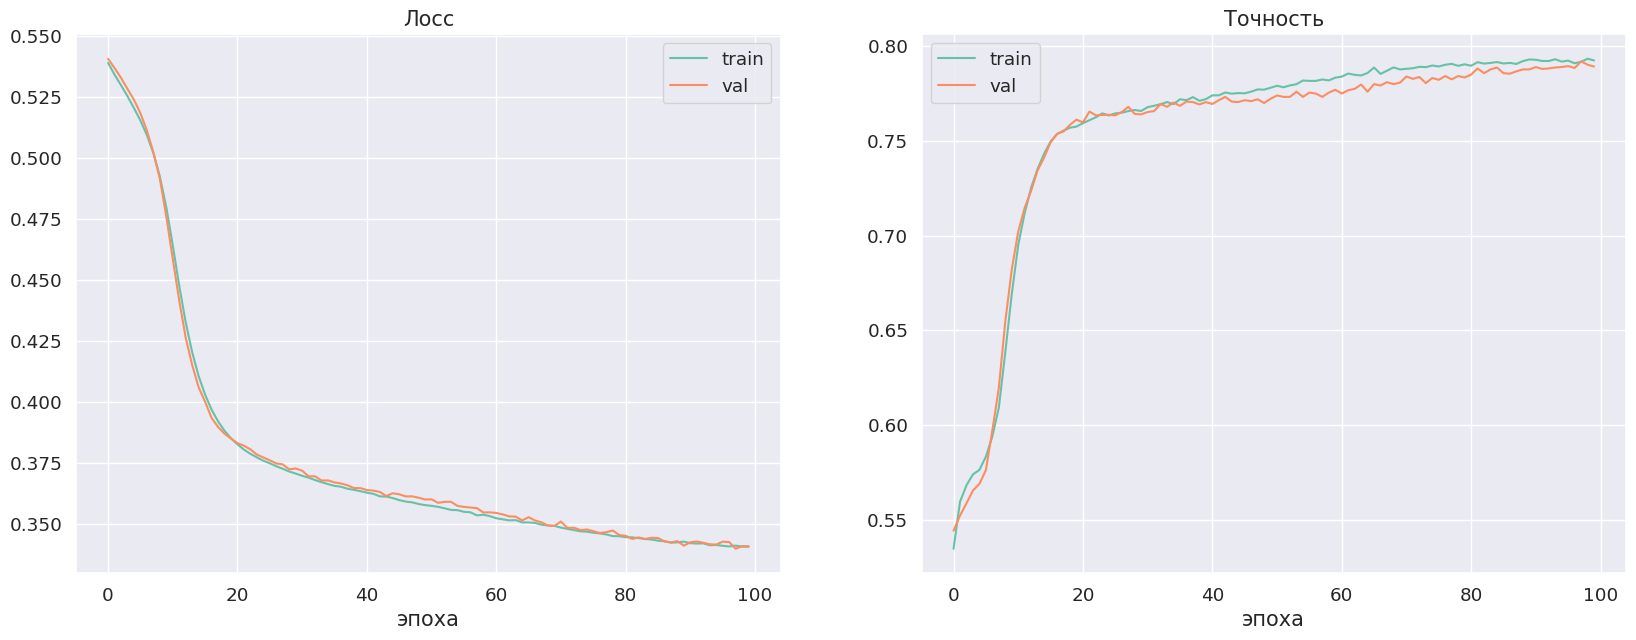

In [81]:
plot_learning_curves(history)

Тестирование

In [82]:
model.eval()
model.cpu()

SimpleModel(
  (linear1): Linear(in_features=8, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=2, bias=True)
)

In [83]:
print('Точность на валидации: ', (history['acc']['val'][-1] * 100).round(2), '%')

Точность на валидации:  78.92 %


**Выводы:**

1) Даже простая модель демонстрирует хорошую точность

2) По графикам видно, что переобучения не происходило, поэтому в Dropout слое нет особого  смысла

3) Так как это задача бинарной классификации, легче было сделать NN классификации с использованием CrossEntropy, чем делать регрессию со своей функцией потерь, а потом сравнивать предикт модели с 0.5. Поэтому я нигде не использовал параметр class_lim_proba